In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [83]:
movie_csv = "movies.csv"
movie_df = pd.read_csv(movie_csv, encoding = "ISO-8859-1")
movie_df.head()

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Rotten_Tomatoes_Rating,Metacritic_Rating,Rated,Home_Release,Production,Country,Awards_Blurb,Languages,Month Released,Awards
0,tt0035423,Kate & Leopold,https://www.imdb.com/title/tt0035423/,movie,6.4,118.0,2001.0,"['Comedy', ' Fantasy', ' Romance']",77905.0,2001-12-11,...,50.0,44.0,PG-13,2002-Jun-11,Miramax Films,USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,"['English', ' French']",12.0,"{'Oscar.': 1, 'win': 1, 'nominations.': 5}"
1,tt0065643,The Dirty Mind of Young Sally,https://www.imdb.com/title/tt0065643/,movie,5.2,95.0,1973.0,['Comedy'],226.0,1973-04-20,...,NaN,NaN,X,0,NaN,USA,NaN,['English'],4.0,{}
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973.0,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,71.0,NaN,PG,2001-Oct-02,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}"
3,tt0068156,1776,https://www.imdb.com/title/tt0068156/,movie,7.6,141.0,1972.0,"['Drama', ' Family', ' History', ' Musical']",7588.0,1972-11-09,...,69.0,NaN,G,2002-Jul-02,Sony Pictures Home Entertainment,USA,Nominated for 1 Oscar. Another 1 win & 1 nomin...,['English'],11.0,Could not parse awards
4,tt0068168,Across 110th Street,https://www.imdb.com/title/tt0068168/,movie,7.0,102.0,1972.0,"['Action', ' Crime', ' Drama', ' Thriller']",4923.0,1972-12-19,...,81.0,NaN,R,2001-Oct-16,MGM,USA,NaN,"['English', ' Italian']",12.0,{}


In [84]:
#Writeng han reading as a csv turns lists back into strings, only with even more to deal with.  I got the number of genres by counting the commas with the following function

movie_df['Num_Genres'] = ''
for index, row in movie_df.iterrows():
    x=1
    for i in row['Genres']:
        if i == ',':
            x+=1
    movie_df.loc[index, 'Num_Genres'] = x
movie_df['Num_Genres'] = movie_df['Num_Genres'].astype(int)

In [85]:
director_df = movie_df.groupby('Directors').agg({
    'Num_Genres':'mean',
    'Box_Office':'mean',
    'IMDb Rating':'mean',
    'Runtime (mins)': 'mean',
    'Const':'count'
})
director_df['Num_Genres'] = director_df['Num_Genres'].round(0)
director_df.head(30)
director_genres_df = director_df.groupby('Num_Genres').agg({
    'Box_Office':'mean',
    'IMDb Rating':'mean',
    'Runtime (mins)': 'mean',
    'Const':'sum'
}).reset_index()
director_genres_df.rename({
    'Box_Office': 'Average Box Office',
    'IMDb Rating': 'Average Rating',
    'Runtime (mins)': 'Average Length (mins)',
    'Const':'Number of Directors'
}, axis = 1, inplace = True)
director_genres_df.head()

,Num_Genres,Average Box Office,Average Rating,Average Length (mins),Number of Directors
0,1.0,1.680679e+07,6.055375,96.069784,296
1,2.0,2.625330e+07,6.109501,97.596238,2014
2,3.0,3.788758e+07,6.158491,101.654897,2184
3,4.0,5.760001e+07,6.077326,100.497414,808
4,5.0,1.011211e+08,6.251387,93.673791,173


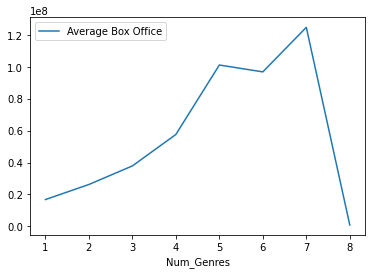

In [86]:
director_genres_df.plot.line('Num_Genres','Average Box Office')

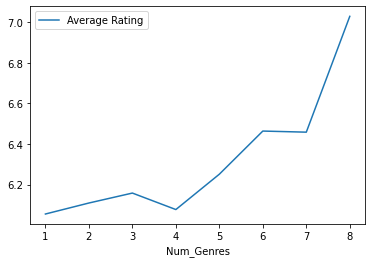

In [87]:
director_genres_df.plot.line('Num_Genres','Average Rating')

In [88]:
numGenres_df = movie_df.groupby('Num_Genres').agg({
    'Box_Office':'mean',
    'IMDb Rating':'mean',
    'Runtime (mins)': 'mean',
    'Const':'count'
}).reset_index()

numGenres_df.rename({
    'Box_Office': 'Average Box Office',
    'IMDb Rating': 'Average Rating',
    'Runtime (mins)': 'Average Length (mins)',
    'Const':'Number of Movies'
}, axis = 1, inplace = True)
numGenres_df

,Num_Genres,Average Box Office,Average Rating,Average Length (mins),Number of Movies
0,1,3.173517e+07,6.316482,98.794159,723
1,2,3.615742e+07,6.256547,100.828824,1703
2,3,5.074879e+07,6.279738,105.186219,1757
3,4,5.994916e+07,6.209759,105.089912,912
4,5,8.276961e+07,6.200292,101.446064,343
5,6,8.967723e+07,6.191892,96.099099,111
6,7,1.047409e+08,6.674074,84.185185,27
7,8,1.374911e+07,6.872727,83.545455,11


In [89]:
numGenres_df = numGenres_df.head(6)

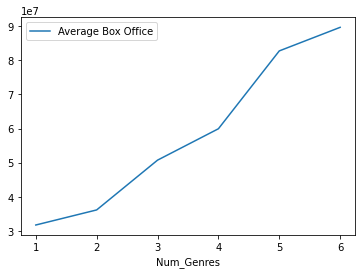

In [90]:
numGenres_df.plot.line('Num_Genres','Average Box Office')

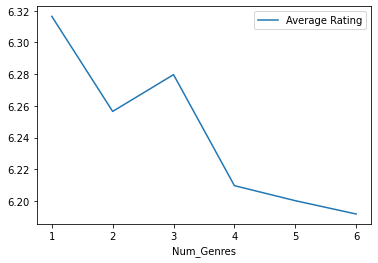

In [91]:
numGenres_df.plot.line('Num_Genres','Average Rating')

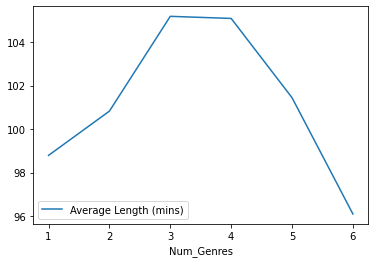

In [92]:
numGenres_df.plot.line('Num_Genres','Average Length (mins)')